#### Box-Cox transform only applicable on number greator than zero
    1.It is a General transform.Where the exponent variable varies from -5 to +5.
#### Yeo - Jhonson is an adjustment in Box-Cox transformation, by which we can apply tothe negative numbers as well.

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv('adult.csv',usecols=['age','hours.per.week','income'])

In [6]:
df.head()

,age,hours.per.week,income
0,90,40,<=50K
1,82,18,<=50K
2,66,40,<=50K
3,54,40,<=50K
4,41,40,<=50K


In [11]:
enc = LabelEncoder()
df['income']= enc.fit_transform(df['income'])

In [12]:
df 

,age,hours.per.week,income
0,90,40,0
1,82,18,0
2,66,40,0
3,54,40,0
4,41,40,0
...,...,...,...
32556,22,40,0
32557,27,38,0
32558,40,40,1
32559,58,40,0


In [13]:
# 0 means > 50K



In [14]:
x = df.drop(columns='income')
y =df['income']

In [15]:
x

,age,hours.per.week
0,90,40
1,82,18
2,66,40
3,54,40
4,41,40
...,...,...
32556,22,40
32557,27,38
32558,40,40
32559,58,40


In [16]:
y 

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int32

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [22]:
import seaborn as sns 

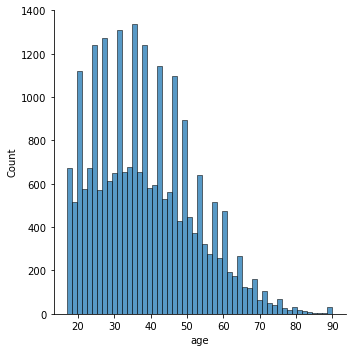

In [23]:
sns.displot(x_train['age'])

In [24]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pred = clf.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred )

0.7521189043115096

In [30]:
pt = PowerTransformer(method='box-cox')

In [32]:
x_train_trf = pt.fit_transform(x_train)
x_test_trf  = pt.transform(x_test)

In [43]:
sns.displot(x_train_trf.iloc)

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [33]:
clf2 = LogisticRegression()
clf2.fit(x_train_trf,y_train)

LogisticRegression()

In [34]:
y_pred2 = clf2.predict(x_test_trf)

In [35]:
accuracy_score(y_test,y_pred2)

0.7533472546370225